In [53]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.reset_orig()

root_path = Path().cwd().parent.parent
data_path = root_path / "common" / "resources" / "datasets"
figures_path = Path().resolve() / "figures"

### Read dataset `histogram.csv`

In [54]:
df = pd.read_csv(data_path / "histogram.csv")
df

,Unnamed: 0,x,y
0,0,0.000000,0.000000
1,1,0.010001,0.007637
2,2,0.020002,0.020413
3,3,0.030003,0.036861
4,4,0.040004,0.024352
...,...,...,...
9995,9995,99.959996,115.243783
9996,9996,99.969997,143.792574
9997,9997,99.979998,119.380849
9998,9998,99.989999,119.797324


Now we want to just plot distributions of collected `x` and `y` variables in the dataset. Let's melt dataframe and use `sns.displot`

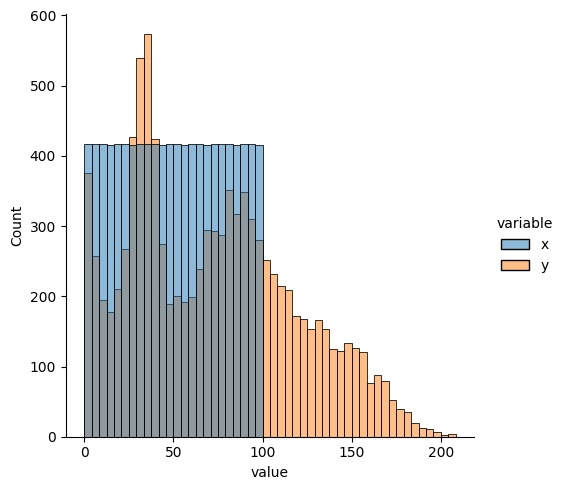

In [55]:
df_melted = df.filter(items=["x", "y"]).melt(var_name="variable", value_name="value")
sns.displot(data=df_melted, x="value", hue="variable")
plt.show()

Attempt to make an advanced step...

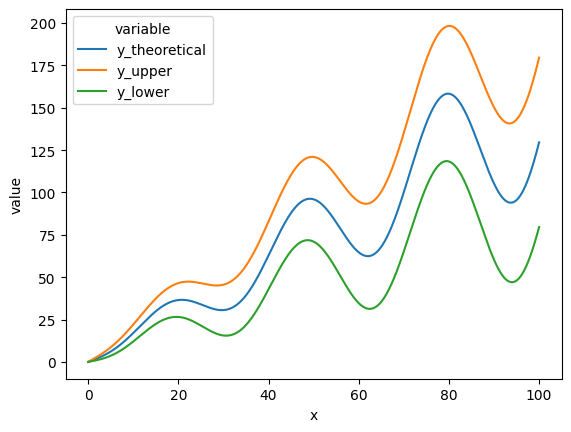

In [62]:
x = np.linspace(0, 100, 10000)
y = df["x"] * (1 + np.sin(df["x"] / 10) ** 2)

y_upper = y + df["x"] / 2
y_lower = y - df["x"] / 2

df_with_errors = pd.DataFrame(
    {
        "x": x,
        "y_theoretical": y,
        "y_upper": y_upper,
        "y_lower": y_lower,
    }
)

df_melted = df_with_errors.melt(
    id_vars="x",
    var_name="variable",
    value_name="value",
)

sns.lineplot(data=df_melted, x="x", y="value", hue="variable")
plt.show()